In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [3]:
NUM_CLASSES = 27

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(68, activation='relu'),  # increased from 20 to 64 neurons
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(34, activation='relu'),  # increased from 10 to 32 neurons
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 68)                  │           2,924 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 68)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 34)                  │           2,346 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 27)                  │             945 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,215 (24.28 KB)

 Trainable params: 6,215 (24.28 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
16/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0451 - loss: 3.3608 
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0536 - loss: 3.3319 - val_accuracy: 0.1881 - val_loss: 3.1574
Epoch 2/1000
20/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0891 - loss: 3.1848 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0965 - loss: 3.1627 - val_accuracy: 0.1997 - val_loss: 2.9511
Epoch 3/1000
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1365 - loss: 2.9804 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1370 - loss: 2.9783 - val_accuracy: 0.2092 - val_loss: 2.7328
Epoch 4/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1642 - loss: 2.8205 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ke

Epoch 109/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7969
Epoch 00109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8379 - val_loss: 0.1955 - val_accuracy: 0.9659
Epoch 110/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3872 - accuracy: 0.8281
Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8505 - val_loss: 0.2020 - val_accuracy: 0.9614
Epoch 111/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3474 - accuracy: 0.8828
Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8433 - val_loss: 0.1984 - val_accuracy: 0.9632
Epoch 112/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4205 

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8580 - loss: 0.6072 


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
[4.69035033e-09 7.72412680e-03 9.71966147e-05 2.68306304e-03
 2.22745570e-04 8.43689311e-04 1.77917370e-09 3.28135793e-05
 4.57813968e-07 1.71207390e-07 1.41690839e-02 5.15752936e-06
 3.87771161e-06 9.92280366e-06 1.06715761e-05 8.89385277e-08
 4.58233913e-08 1.11364566e-01 2.35887492e-05 1.92257339e-05
 7.08406389e-01 9.90244672e-02 5.53027950e-02 2.76928477e-05
 6.49453256e-08 1.10437277e-05 1.69342075e-05]
20


# 混同行列

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


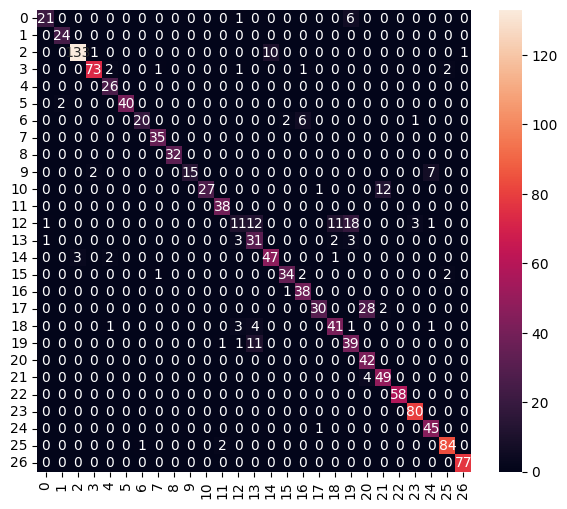

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1       0.92      1.00      0.96        24
           2       0.98      0.92      0.95       145
           3       0.96      0.91      0.94        80
           4       0.84      1.00      0.91        26
           5       1.00      0.95      0.98        42
           6       0.95      0.69      0.80        29
           7       0.95      1.00      0.97        35
           8       1.00      1.00      1.00        32
           9       1.00      0.62      0.77        24
          10       1.00      0.68      0.81        40
          11       0.93      1.00      0.96        38
          12       0.55      0.19      0.29        57
          13       0.53      0.78      0.63        40
          14       0.82      0.89      0.85        53
          15       0.92      0.87      0.89        39
          16       0.81      0.97      0.88        39
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\kenjl\AppData\Local\Temp\tmpperymaqy\assets


INFO:tensorflow:Assets written to: C:\Users\kenjl\AppData\Local\Temp\tmpperymaqy\assets


Saved artifact at 'C:\Users\kenjl\AppData\Local\Temp\tmpperymaqy'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 27), dtype=tf.float32, name=None)
Captures:
  1844093673040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1844093670160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1844093669968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1844093675536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1842705921424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1842705919696: TensorSpec(shape=(), dtype=tf.resource, name=None)


12728

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.0102615e-09 7.7187340e-03 9.3449329e-05 2.5082156e-03 2.0104577e-04
 8.0343115e-04 1.5810472e-09 3.1931158e-05 3.8683663e-07 1.5317300e-07
 1.3989001e-02 4.5383035e-06 3.5126532e-06 9.0372423e-06 9.8566943e-06
 8.0254964e-08 4.3301121e-08 1.0857514e-01 2.1326105e-05 1.7625936e-05
 7.0895898e-01 1.0114569e-01 5.5855431e-02 2.5876816e-05 5.4447852e-08
 1.0077668e-05 1.6435371e-05]
20
